<b><font size="6">01. Data Preprocessing</font><a class="anchor"><a id='toc'></a></b><br><br>
This notebook requires previous knowledge in Pandas library. Feel free to complement your knowledge with online tutorials such as:<br>
https://learn.datacamp.com/courses/data-manipulation-with-pandas <br>

# <font color='#BFD72F'>1. Importing Data</font> <a class="anchor" id="first-bullet"></a>

**Step 1 -** Connect the google colab notebook with your google drive. Before running the code below, make sure you have this notebook in the folders mentioned in the variable 'path'.<br>

In [10]:
# Connect Google Colab to Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/MyDrive/Colab Notebooks/DMDM/2 - Data Preprocessing/1 - Data Preprocessing/'

Mounted at /content/drive


**Step 1 -** Import the pandas library and define the alias as 'pd'. <br>

In [8]:
# Import pandas
import pandas as pd

**Step 2 -** Read the excel file 'tugas.xlsx' and save it to the object `data` using the pandas method `pd.read_excel()`

In [12]:
# Import the dataset
tugas = pd.read_excel(path + r'data/tugas.xlsx')

<a class="anchor" id="data">
    
## 1.1. The data available: Customer information

</a>

- **Customer ID**

##### Sociodemographic data:
- **Gender**
- **Age** 
- **Education**
- **Marital Status**
- **Dependents**
- **Income**

##### Firmographic data:
- **RFM**
- **Product purchase history (Clothes / House Keeping / Kitchen / Small Appliances / Toys)**
- **Channel usage**
- **Recommendation**

# <font color='#BFD72F'>2. Data Preparation</font> <a class="anchor" id="second-bullet"></a>


* [2.1 - Data Preparation](#preparation)
* [2.2 - Data Cleaning](#cleaning)
* [2.3 - Feature Engineering](#transformation)
* [2.4 - Scaling Data](#normalize)
* [2.5 - Correlations](#corr)

<a class="anchor" id="preparation">

## 2.1.  Data Preparation

</a>

[Back to Data Preparation](#second-bullet) <br><br>
In this phase, we are going to view some useful commands to prepare the dataset to suffer preprocessing tasks.

We are going to learn how to:
- Make copies of the original dataset; <br>
- Drop columns; <br>
- Rename columns; <br>
- Set the index; <br>
- Convert data types; <br>

### 2.1.1. Duplicated Data

Do we have duplicated rows? We can check that using the pandas method `duplicated()`. When using this method there are some parameters we can provide to it. We can use `subset` to only check for duplicates within a specific subset of columns. We can set the `keep` parameter to 'first', 'last' or False. Setting the `keep` parameter to 'first' will signal all duplicates as True except for their first occurrence. Similarly, setting `keep` to 'last' will signal all duplicate records as True except for their last occurrence. If we want to see all duplicate records we should set `keep` to False.

**Step 3 -** Using the method `duplicated()` check if there are rows duplicated in the dataset.

In [13]:
# Step 3
tugas[tugas.duplicated(keep=False)]

,Unnamed: 0,Custid,Year_Birth,Gender,Education,Marital_Status,Dependents,Income,Dt_Customer,Rcn,Frq,Mnt,Clothes,Kitchen,SmallAppliances,HouseKeeping,Toys,NetPurchase,CatPurchase,Recomendation
24,24,1677,1941,F,Graduation,Married,0,99323.7,2014-01-09,71,26,1134.64,42,20,27,2,9,16,84,5
25,24,1677,1941,F,Graduation,Married,0,99323.7,2014-01-09,71,26,1134.64,42,20,27,2,9,16,84,5


It seems that we have two rows that are duplicated. <br>

**Step 4 -** To drop the duplicate row(s), we can use the `drop_duplicates()` method. <br>
Most methods in pandas do not apply the changes directly to the object. In this way, and in this case, we need to define the parameter inplace as `inplace = True` so the changes are applied directly on the dataset. <br>
Once again, `drop_duplicates` also has a `keep` parameter. The default value for this parameter is 'first', meaning it will keep first occurrences of duplicate rows in the dataset.

In [14]:
# Step 4
tugas.drop_duplicates(inplace = True)

Now the data is clean from duplicate rows.

In [15]:
tugas[tugas.duplicated(keep=False)]

,Unnamed: 0,Custid,Year_Birth,Gender,Education,Marital_Status,Dependents,Income,Dt_Customer,Rcn,Frq,Mnt,Clothes,Kitchen,SmallAppliances,HouseKeeping,Toys,NetPurchase,CatPurchase,Recomendation


|Method | Description | Link |
|-----|-----|----|
| pandas.DataFrame.duplicated()| Return boolean Series denoting duplicate rows, optionally only considering certain columns.|[+ info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html)|
| pandas.DataFrame.drop_duplicates()| Return DataFrame with duplicate rows removed, optionally only considering certain columns..|[+ info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)|

### 2.1.2. Make a copy from the original dataset

In some cases, as a way to not affect our original dataset, or to create a new dataset using a subset of the original dataset, we should use the `copy()` method.

**Step 5** -  Using the pandas method `copy()`, create a new dataset named `tugas2` with the variables ['Custid','Year_Birth','Gender']:

In [16]:
tugas2 = tugas[['Custid','Year_Birth','Gender']].copy()
tugas2.head()

,Custid,Year_Birth,Gender
0,1041,1997,F
1,1061,1947,F
2,1076,1986,F
3,1091,1969,F
4,1094,1964,M


When using `copy()` keep in mind it accepts a parameter called `deep`. If set to True (the default value), a copy of the original dataset is created so that modifications to the data or indices of the copy will not be reflected in the original object. However, if this parameter is set to False, only references to the data will be copied, which means that any changes to the data of the original will be reflected in the copy (and vice versa).

### 2.1.3. Drop a column

If we want to drop a column from our dataset, we can use the method `drop()`.

**Step 6** -  Using the pandas method `drop()`, remove the column `Custid`from **tugas2**, defining the following parameters:
- `labels = ['Custid']`
- `axis = 1`
- `inplace = True`

In [17]:
# Step 6
tugas2.drop(labels = ['Custid'], axis = 1, inplace = True)
tugas2.head()

,Year_Birth,Gender
0,1997,F
1,1947,F
2,1986,F
3,1969,F
4,1964,M


The parameter `axis` accepts eitheir the value 0 or 1, meaning whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’). Dropping labels from the index is the same as dropping rows.

### 2.1.4. To rename columns

As a way to make the dataset more perceptible, sometimes we may need to change the columns names.

In [18]:
tugas2 = tugas[['Custid','Year_Birth','Gender']].copy()

**Step 7** -  Rename the columns directly by associating a list of new names of columns to the attribute `columns` of the dataset `tugas2`.

In [19]:
tugas2.columns

Index(['Custid', 'Year_Birth', 'Gender'], dtype='object')

In [20]:
# Step 7
tugas2.columns = ['NumberCust','Year','Male_Fem']
tugas2.head()

,NumberCust,Year,Male_Fem
0,1041,1997,F
1,1061,1947,F
2,1076,1986,F
3,1091,1969,F
4,1094,1964,M


If we want to rename only some columns, passing a list with names for all columns can be exhaustive. In these cases we can use the method `rename()`.

In [21]:
tugas2.rename(columns={"NumberCust": "Custid", "Male_Fem": "Gen"}, inplace=True)
tugas2.head()

,Custid,Year,Gen
0,1041,1997,F
1,1061,1947,F
2,1076,1986,F
3,1091,1969,F
4,1094,1964,M


### 2.1.5. To set index

In [22]:
tugas2 = tugas[['Custid','Year_Birth','Gender']].copy()

If we want to define the index of our dataset as being a specific column that we have, we can use the method `set_index()`.

**Step 8** -  Redefine the index of `tugas2` by calling the method `set_index` and fill the parameters as follows:
- `keys='Custid'`
- `inplace = True`

In [23]:
# Step 8
tugas2.set_index('Custid', inplace = True)
tugas2.head()

,Year_Birth,Gender
Custid,,
1041,1997,F
1061,1947,F
1076,1986,F
1091,1969,F
1094,1964,M


### 2.1.6. Convert Data Types

In some situations, converting a variable to a different data type can be handy.

**Step 9** -  Check the type of the variable `'Year_Birth'` using the attribute `dtype`

In [24]:
# Step 9
tugas2['Year_Birth'].dtype

dtype('int64')

It seems that Year_Birth is an integer value (with 64bits). Lets change it to an integer value of 32bits.

**Step 10** -  Define the datatype of `Year_Birth` from the dataset `tugas2` as `int32` recurring to the method `astype()`. <br>
Confirm the new datatype using the attribute `dtype`.

In [25]:
# Step 10
tugas2['Year_Birth'] = tugas2['Year_Birth'].astype('int32')
tugas2['Year_Birth'].dtype

dtype('int32')

|Library | Method | Description | Link |
|-----|-----|----|----|
| Pandas | pandas.DataFrame.copy() | Make a copy of this object’s indices and data.|[+ info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html)|
| Pandas | pandas.DataFrame.drop() | Drop specified labels from rows or columns. |[+ info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)|
| Pandas | pandas.DataFrame.rename()| Alter axes labels.|[+ info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)|
| Pandas | pandas.DataFrame.set_index()| Set the DataFrame index using existing columns.|[+ info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html)|
| Pandas | pandas.DataFrame.astype()| Cast a pandas object to a specified dtype.|[+ info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)|

<a class="anchor" id="cleaning">

## 2.2.  Data Cleaning

</a>

[Back to Data Preparation](#second-bullet) <br><br>

- Replace values; <br>
- Check missing values; <br>
- Filter out missing values; <br>
- Drop rows; <br>
- Fill in missing values; <br>
- Detect and remove outliers; <br>

### 2.2.1. Replace Values

The method `replace()`allows the replacing of values from a variable with other values dinamically. <br>
This can be handy if there are some labels we would like to change in categorical data, for example.

**Step 11** -  Using the method `replace()`, change the values of the variable `Marital_Status` in the dataset `tugas` by defining the following parameters:
- `to_replace = 'Together'`
- `value = 'Married'`
- `inplace = True`

Check the quantity of each level in this variable by using the method `value_counts()`

In [26]:
#Before
tugas['Marital_Status'].value_counts()

Married         141
Together        114
Single           70
Divorced         42
Widow            28
BigConfusion      4
Name: Marital_Status, dtype: int64

In [27]:
# Step 11
tugas['Marital_Status'].replace(to_replace = 'Together',value = 'Married', inplace = True)

In [28]:
#After
tugas['Marital_Status'].value_counts()

Married         255
Single           70
Divorced         42
Widow            28
BigConfusion      4
Name: Marital_Status, dtype: int64

### 2.2.2. Check missing values

We can use the methods `isna()` and `sum()` combined as a way to obtain a list of the variables containg missing values.

**Step 12** - By using the methods `isna().sum()`, verify how many missing values do we have for each of the variables.

In [29]:
# Step 12
tugas.isna().sum()

Unnamed: 0          0
Custid              0
Year_Birth          0
Gender              0
Education           3
Marital_Status      1
Dependents          0
Income             15
Dt_Customer         0
Rcn                 0
Frq                 0
Mnt                 0
Clothes             0
Kitchen             0
SmallAppliances     0
HouseKeeping        0
Toys                0
NetPurchase         0
CatPurchase         0
Recomendation       0
dtype: int64

**Step 13** - If we want to have those results in percentage, we can use python as if it was a calculator. <br>

In this case, we are using also the function `len()` that returns the number of rows we have in the object (in this case, tugas).

In [30]:
# Step 13
tugas.isna().sum()/len(tugas)*100

Unnamed: 0         0.00
Custid             0.00
Year_Birth         0.00
Gender             0.00
Education          0.75
Marital_Status     0.25
Dependents         0.00
Income             3.75
Dt_Customer        0.00
Rcn                0.00
Frq                0.00
Mnt                0.00
Clothes            0.00
Kitchen            0.00
SmallAppliances    0.00
HouseKeeping       0.00
Toys               0.00
NetPurchase        0.00
CatPurchase        0.00
Recomendation      0.00
dtype: float64

### 2.2.3. Filter out missing values

There are several ways to deal with rows containing missing values. One possibility is to drop those rows. In the next steps we are going to see some examples and some conditions defined as a way to check if we should or shouldn't remove the rows.

**Step 14** - By using the method `dropna()`, create a new dataset named `tugasRows_no_missing`. When used with the parameters set to the default values, this method removes any row containing at least one missing value.

In [31]:
# Step 14
# drop any row containing missing values
tugasRows_no_missing = tugas.dropna()
print("The number of rows in the original tugas dataset is", tugas.shape[0])
print("The number of rows in the tugas dataset with no missing values is", tugasRows_no_missing.shape[0])
print("There were", tugas.shape[0]-tugasRows_no_missing.shape[0], "rows containing missing values.")

The number of rows in the original tugas dataset is 400
The number of rows in the tugas dataset with no missing values is 382
There were 18 rows containing missing values.


**Step 15** - By using the method `dropna()`, create a new dataset named `tugasRows_cleaned`, but this time define the parameter `how='all'`. By changing this parameter we are only removing rows where all values are missing.

In [32]:
# Step 15
# drop rows where all cells in that row are NA
tugasRows_cleaned = tugas.dropna(how='all')
print("The number of rows in the tugas dataset with no missing rows is", tugasRows_cleaned.shape[0])

The number of rows in the tugas dataset with no missing rows is 400


**Step 16** - By using the method `dropna()`, create a new dataset named `tugasRows_3`, but this time define the parameter `thresh=3`. By setting this parameter to 3 we are only removing rows with less than three non-missing values.

In [33]:
# Step 16
# drop any row containing < 3 number of observations
tugasRows_3 = tugas.dropna(thresh = 3)
print("The number of rows in the tugas dataset with rows with 3 or more non-missing values is", tugasRows_3.shape[0])

The number of rows in the tugas dataset with rows with 3 or more non-missing values is 400


**Step 17** - By using the method `dropna()`, create a new dataset named `tugasRows_no_missing`, but this time define the parameter `axis = 1`. By changing  this parameter we are dropping all columns that contain missing values.

In [34]:
# Step 17
# drop any column containing missing values
tugasCols_no_missing = tugas.dropna(axis = 1)
print("The number of columns in the original tugas dataset is", tugas.shape[1])
print("The number of columns in the tugas dataset with no missing values is", tugasCols_no_missing.shape[1])
print("There were", tugas.shape[1]-tugasCols_no_missing.shape[1], "columns containing missing values.")

The number of columns in the original tugas dataset is 20
The number of columns in the tugas dataset with no missing values is 17
There were 3 columns containing missing values.


We can make different combinations of these parameters to remove missing values at our will.

### 2.2.4. Drop rows

**Step 18** - If we want to drop specific rows in our dataset, we can call the method `drop`and define the parameters `axis = 0`as a way to say that we want to remove the rows and `labels=[1,2,3]` (if we want to remove the rows indexed as 1, 2 and 3). Define a new dataset with this changes named as `tugas_droprow`.

In [35]:
# Step 18
tugas_droprow = tugas.drop([1,2,3], axis = 0)
tugas_droprow.head()

,Unnamed: 0,Custid,Year_Birth,Gender,Education,Marital_Status,Dependents,Income,Dt_Customer,Rcn,Frq,Mnt,Clothes,Kitchen,SmallAppliances,HouseKeeping,Toys,NetPurchase,CatPurchase,Recomendation
0,0,1041,1997,F,Basic,Single,1,37950.15,2013-08-08,65,14,156.00,6,28,27,17,22,60,40,4
4,4,1094,1964,M,PhD,Widow,1,94752.00,2013-06-11,8,21,624.00,91,0,8,0,1,44,56,5
5,5,1102,1937,M,2n Cycle,Divorced,0,103050.15,2013-06-07,29,21,811.20,24,12,42,18,4,23,77,2
6,6,1123,1960,F,Graduation,Single,1,77926.80,2012-10-02,1,33,1335.36,54,0,32,6,7,27,73,6
7,7,1124,1965,F,Graduation,Divorced,1,86837.10,2013-03-05,28,36,1399.84,82,5,12,1,1,47,53,5


### 2.2.4. Fill in missing values

Instead of dropping the rows or columns with missing values, a better approach in some cases would be to fill in those missing values.

**Step 19** - We can fill in the missing values with a constant value. For that, use the method `fillna()` and define the parameter `value = 0` to change those missing values to the value 0. Create a new dataset named `tugas_fill0` when applying this replacement.

In [36]:
# Step 19
# Replace the missing value with some constant, for example 0
tugas_fill0 = tugas.fillna(0)
tugas_fill0.isna().sum()

Unnamed: 0         0
Custid             0
Year_Birth         0
Gender             0
Education          0
Marital_Status     0
Dependents         0
Income             0
Dt_Customer        0
Rcn                0
Frq                0
Mnt                0
Clothes            0
Kitchen            0
SmallAppliances    0
HouseKeeping       0
Toys               0
NetPurchase        0
CatPurchase        0
Recomendation      0
dtype: int64

**Step 20** - We could also replace the missing values with the mean of the variable. For that, use the method `fillna()` and define the parameter `value = tugas.mean()` to change those missing values to the mean value. Create a new dataset named `tugas_fill_mean` when applying this replacement.

In [37]:
# Step 20
# replace the missing value with the mean - numeric variables
tugas_fill_mean = tugas.fillna(tugas.mean(numeric_only=True))
tugas_fill_mean.isna().sum()

Unnamed: 0         0
Custid             0
Year_Birth         0
Gender             0
Education          3
Marital_Status     1
Dependents         0
Income             0
Dt_Customer        0
Rcn                0
Frq                0
Mnt                0
Clothes            0
Kitchen            0
SmallAppliances    0
HouseKeeping       0
Toys               0
NetPurchase        0
CatPurchase        0
Recomendation      0
dtype: int64

We can see that for this dataset, missing values in variables Education and Marital_Status were not replaced by the mean. This is because both are categorical variables, which means that their average value can't be calculated. However, missing values in income were replaced.

### 2.2.4. Detect and remove outliers

Let's see in the next steps how to draw a boxplot and how to remove all the rows that we consider as outliers according to the plot.

**Step 21** - Using the seaborn method `boxplot()`, create a univariate plot by defining the parameters:
- `x = 'HouseKeeping'`
- `data = 'tugas'`<br>

Check the shape of tugas using the attribute `shape`

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

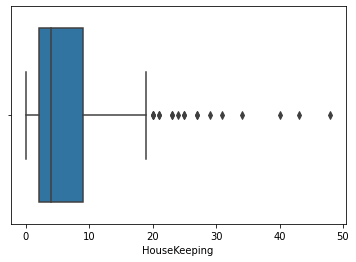

In [39]:
# Step 21
sns.boxplot(x='HouseKeeping', data = tugas)

**Step 22** - Create a new dataset named `tugas_droprow` that will be equal to the tugas dataset, but only for the rows where Housekeeoing is not considered an outlier according to the boxplot.

Check the shape of `tugas_droprow` using the attribute `shape`

In [40]:
# Step 22
tugas_droprow =  tugas[tugas['HouseKeeping'] < 20]
tugas_droprow.shape

(382, 20)

|Library | Method | Description | Link |
|-----|-----|----|----|
| Pandas | pandas.DataFrame.replace() | Replace values given in to_replace with value.|[+ info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)|
| Pandas | pandas.DataFrame.dropna() | Remove missing values. |[+ info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)|
| Pandas | pandas.DataFrame.fillna()| Fill NA/NaN values using the specified method.|[+ info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)|

Always keep in mind that removing outliers is a very subjective process. Sometimes outliers may carry information that is important for future models. Be very careful when removing outliers.

<a class="anchor" id="transformation">

## 2.3.  Feature Engineering

</a>

[Back to Data Preparation](#second-bullet) <br>

In this phase, we are going to learn how to:

- Check coherence on the dataset; <br>
- Make transformations to the dataset; <br>
- Create dummy variables. <br>

### 2.3.1. Check coherence

Incoherences in our dataset occur when we find situations that are impossible to happen. <br>
By exploring the data we find that the maximum value of the variable `Recomendation` is 6, while by definition it should be a rating between 1 and 5.

**Step 23** -  Check the maximum value of the variable `Recomendation` in the dataset `tugas` using the method `max()`.

In [41]:
# Step 23
tugas['Recomendation'].max()

6

**Step 24** -  In cases where the Recomendation is higher than 5, redefine that value as 5. Verify again the maximum value of the variable.

In [42]:
# Step 24
tugas.loc[tugas['Recomendation']>5,'Recomendation']=5
#tugas['Recomendation'].replace(6,5, inplace = True)
tugas['Recomendation'].max()

5

### 2.3.2. Data Transformations

Sometimes the creation of new variables can give more insight and have a major importance to the final model than the original ones. Let's see some examples.

**Step 25** -  Import the module `date` from the library `datetime`. Define a new variable in tugas named `Age` that is going to be equal to the following function: `date.today().year - tugas['Year_Birth']`. Check the result using the `head()` method.

In [43]:
# Step 25
from datetime import date
#Get Age
tugas['Age'] = date.today().year - tugas['Year_Birth']
tugas.head()

,Unnamed: 0,Custid,Year_Birth,Gender,Education,Marital_Status,Dependents,Income,Dt_Customer,Rcn,...,Mnt,Clothes,Kitchen,SmallAppliances,HouseKeeping,Toys,NetPurchase,CatPurchase,Recomendation,Age
0,0,1041,1997,F,Basic,Single,1,37950.15,2013-08-08,65,...,156.00,6,28,27,17,22,60,40,4,25
1,1,1061,1947,F,PhD,Widow,0,100873.50,2014-05-02,6,...,1331.20,41,2,49,4,4,17,83,4,75
2,2,1076,1986,F,PhD,Married,1,65426.55,2013-10-21,86,...,153.92,68,1,27,3,1,54,46,3,36
3,3,1091,1969,F,Graduation,Single,1,76444.20,2013-07-09,85,...,229.84,66,6,21,6,1,54,46,3,53
4,4,1094,1964,M,PhD,Widow,1,94752.00,2013-06-11,8,...,624.00,91,0,8,0,1,44,56,5,58


**Step 26** -  Create a new variable named `R_Mnt_Frq` in tugas dataset that is going to be equal to the function: `tugas['Mnt']/tugas['Frq']`, i.e., the ratio between the monetary and the frequency of the customer. Check the result using the `head()`method.

In [44]:
# Step 26
# Create new variable: Ratio between Monetary and Frequency
tugas['R_Mnt_Frq'] = tugas['Mnt']/tugas['Frq']
tugas.head()

,Unnamed: 0,Custid,Year_Birth,Gender,Education,Marital_Status,Dependents,Income,Dt_Customer,Rcn,...,Clothes,Kitchen,SmallAppliances,HouseKeeping,Toys,NetPurchase,CatPurchase,Recomendation,Age,R_Mnt_Frq
0,0,1041,1997,F,Basic,Single,1,37950.15,2013-08-08,65,...,6,28,27,17,22,60,40,4,25,11.142857
1,1,1061,1947,F,PhD,Widow,0,100873.50,2014-05-02,6,...,41,2,49,4,4,17,83,4,75,45.903448
2,2,1076,1986,F,PhD,Married,1,65426.55,2013-10-21,86,...,68,1,27,3,1,54,46,3,36,12.826667
3,3,1091,1969,F,Graduation,Single,1,76444.20,2013-07-09,85,...,66,6,21,6,1,54,46,3,53,15.322667
4,4,1094,1964,M,PhD,Widow,1,94752.00,2013-06-11,8,...,91,0,8,0,1,44,56,5,58,29.714286


**Step 27** -  Create a new variable named `Higher_Educ` in the tugas dataset that assumes the value 1 if the Education of the Customer is equal to Graduation or Master or PhD or 0 otherwise.

In [45]:
# Step 27
# Convert Education to a binary variable where:
# Higher Education includes Graduation, Master or PhD (1)
# Else 0

import numpy as np
tugas['Higher_Educ'] = np.where((tugas['Education']=='Graduation')|
                               (tugas['Education']=='Master')|
                               (tugas['Education']=='PhD'),1,0)
tugas.head()

,Unnamed: 0,Custid,Year_Birth,Gender,Education,Marital_Status,Dependents,Income,Dt_Customer,Rcn,...,Kitchen,SmallAppliances,HouseKeeping,Toys,NetPurchase,CatPurchase,Recomendation,Age,R_Mnt_Frq,Higher_Educ
0,0,1041,1997,F,Basic,Single,1,37950.15,2013-08-08,65,...,28,27,17,22,60,40,4,25,11.142857,0
1,1,1061,1947,F,PhD,Widow,0,100873.50,2014-05-02,6,...,2,49,4,4,17,83,4,75,45.903448,1
2,2,1076,1986,F,PhD,Married,1,65426.55,2013-10-21,86,...,1,27,3,1,54,46,3,36,12.826667,1
3,3,1091,1969,F,Graduation,Single,1,76444.20,2013-07-09,85,...,6,21,6,1,54,46,3,53,15.322667,1
4,4,1094,1964,M,PhD,Widow,1,94752.00,2013-06-11,8,...,0,8,0,1,44,56,5,58,29.714286,1


### 2.3.3. Create dummy variables

Some algorithms are only able to work with numerical data. Because of that, categorical data should be converted to dummies.

**Step 28** -  Create a new dataset named `cat_data` that will contain the columns ['Custid','Education','Marital_Status'] from the dataset `tugas`. 

In [46]:
# Step 28
cat_data = tugas[['Custid','Education','Marital_Status']].copy()
cat_data.head()

,Custid,Education,Marital_Status
0,1041,Basic,Single
1,1061,PhD,Widow
2,1076,PhD,Married
3,1091,Graduation,Single
4,1094,PhD,Widow


**Step 29** -  Create a new dataset named `dummy` that is going to equal `pd.get_dummies(cat_data, drop_first=True)`.
Check the new dataset using the `head()`method.

In [47]:
# Step 29
dummy = pd.get_dummies(cat_data, drop_first = True)
dummy.head()

,Custid,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widow
0,1041,1,0,0,0,0,0,1,0
1,1061,0,0,0,1,0,0,0,1
2,1076,0,0,0,1,0,1,0,0
3,1091,0,1,0,0,0,0,1,0
4,1094,0,0,0,1,0,0,0,1


|Library | Method | Description | Link |
|-----|-----|----|----|
| Numpy| numpy.where() | Return elements chosen from x or y depending on condition.|[+ info](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html)|
| Pandas | pandas.DataFrame.get_dummies() | Convert categorical variable into dummy/indicator variables. |[+ info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)|

<a class="anchor" id="normalize">

## 2.4.  Scaling Data

</a>

[Back to Data Preparation](#second-bullet)

### 2.4.1. MinMaxScaler

Sometimes (and most of the times), the best strategy is to work with the dataset scaled to a specific range than using the original values. For that, we are going to use the MinMaXScaler.


**Step 30.1** - Import __MinMaxScaler__ from __sklearn.preprocessing__

In [48]:
from sklearn.preprocessing import MinMaxScaler

**Step 30.2** - Create a new dataset named `finalData`that will contain the columns ['Clothes','Kitchen','SmallAppliances','HouseKeeping','Toys'] from tugas.

In [49]:
# Step 30.2
finalData = tugas[['Clothes','Kitchen','SmallAppliances','HouseKeeping','Toys']]

**Step 30.3** - Create an instance of MinMaxScaler() named `minmax_scaler`.

In [50]:
# Step 30.3
minmax_scaler = MinMaxScaler()

__Step 30.4:__ Use the `.fit()`method of `minmax_scaler` to fit the scaler to `finalData` and assign the results to the object `scale`

In [51]:
# Step 30.4
scale = minmax_scaler.fit(finalData)

__Step 30.5:__ Use the `.transform()` method of `scale` to apply MinMaxScaler to `finalData` and assign it to the object `minmax_data`. 

In [52]:
# Step 30.5
minmax_data = scale.transform(finalData)

__Step 30.6:__ Create a new dataset named `minmax_data` that will contain the following command : `pd.DataFrame(minmax_data, columns = finalData.columns)`. This will allow converting the array created in the previous step to a DataFrame, and define the column names. <br>

Check the result of `minmax_data`by using the method `head()`.

In [53]:
# Step 30.6
minmax_data = pd.DataFrame(minmax_data, columns = finalData.columns)
minmax_data.head()

,Clothes,Kitchen,SmallAppliances,HouseKeeping,Toys
0,0.032258,0.736842,0.353846,0.354167,0.564103
1,0.408602,0.052632,0.692308,0.083333,0.102564
2,0.698925,0.026316,0.353846,0.062500,0.025641
3,0.677419,0.157895,0.261538,0.125000,0.025641
4,0.946237,0.000000,0.061538,0.000000,0.025641


|Library | Method | Description | Link |
|-----|-----|----|----|
| Sklearn| sklearn.preprocessing.MinMaxScaler() | Transform features by scaling each feature to a given range.|[+ info](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)|
| Sklearn| sklearn.preprocessing.MinMaxScaler().fit() | Compute the minimum and maximum to be used for later scaling.|[+ info](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler.fit)|
| Sklearn| sklearn.preprocessing.MinMaxScaler().transform() | Scale features of X according to feature_range.|[+ info](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler.transform)|
| Pandas| pandas.DataFrame() | Construct a pandas DataFrame.|[+ info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)|

<a class="anchor" id="corr">

## 2.5. Correlations

</a>

[Back to Data Preparation](#second-bullet)

### 2.5.1 Heatmap
The heatmap can be a useful tool to understand correlations between variables.

**Step 31.1** -  Create a copy named `tugas_corr` from the dataset tugas using the `copy()` method. <br><br>
**Step 31.2** -  Drop the variables ['Custid','CostPerContact','RevenuePerPositiveAnswer','DepVar']<br><br>
**Step 31.3** - Create a new dataframe named `corr` with the correlation between the variables, using the `corr()`method.<br><br>
**Step 31.4** - Create a figure named `figure` using the method `matplotlib.pyplot.figure()` and change the size of the figure by defining as parameter `figsize = (16.10)`<br><br>
**Step 31.5** - Create a heatmap plot by calling the seaborn method `heatmap()` and define the following parameters:<br>
- `data = corr`
- `annot = True`
- `fmt = '.1g'`

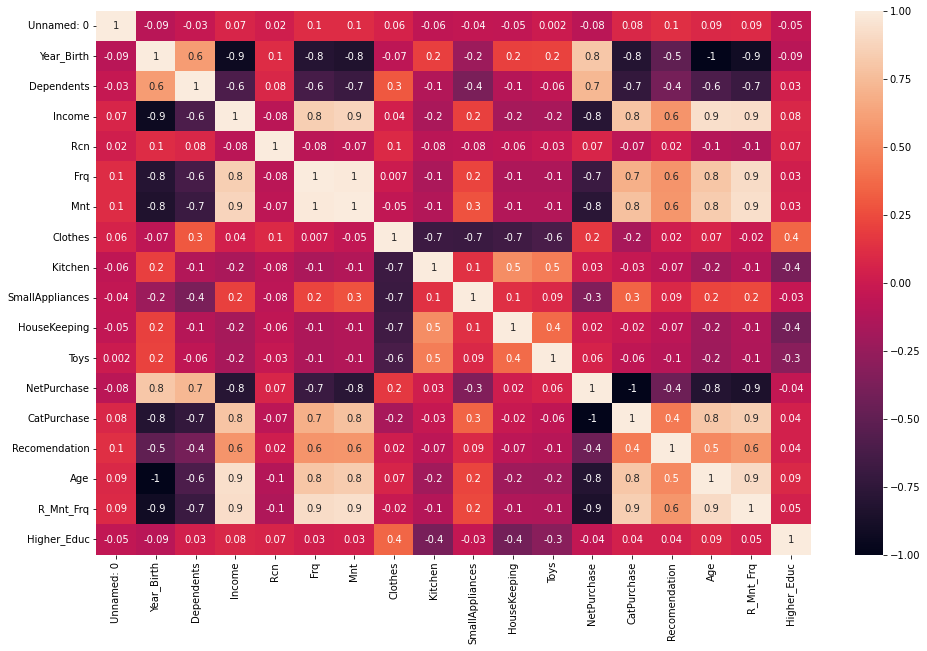

In [54]:
# Step 31.1
tugas_corr = tugas.copy()
# Step 31.2
tugas_corr.drop(['Custid'], axis = 1, inplace = True)
# Step 31.3
corr = tugas_corr.corr()
# Step 31.4
figure = plt.figure(figsize=(16,10))
# Step 31.5
sns.heatmap(data = corr, annot=True, fmt = '.1g')